In [25]:
import pandas as pd

In [26]:
#Read the files into python as dataframes
df1= pd.read_csv("C:/Users/laura/Desktop/ironhack/lab-customer-analysis-round-2/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

In [27]:
#Show the DataFrame's shape.
df1= pd.read_csv("C:/Users/laura/Desktop/ironhack/lab-customer-analysis-round-2/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")
print(df1.shape)

(10910, 26)


In [28]:
#Standardize header names.
df1.columns = df1.columns.str.lower().str.replace(" ", "_")

df1 = df1.rename(columns={'state':'st'})

In [29]:
#Which columns are numerical?
numerical_cols = df1.select_dtypes(include='number').columns

# Print the numerical column names
print(numerical_cols)

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')


In [30]:
#Which columns are categorical?
categorical_cols = df1.select_dtypes(include='object').columns

# Print the categorical column names
print(categorical_cols)

Index(['customer', 'st', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


In [31]:
#Check and deal with NaN values.
df1.isnull().sum()

unnamed:_0                          0
customer                            0
st                                631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   st                             10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [33]:
df1.isna().sum()

unnamed:_0                          0
customer                            0
st                                631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [34]:
#We see that we have with Nan values:st,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size, vehicle_type

In [35]:
#We are going to remove the Nan values from rows st and response
df1 = df1.dropna(subset=["st", "response"])
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [36]:
# Now, we are going to replacing Nans from numerical columns with the median: number_of_open_complaints
col_median = df1["months_since_last_claim"].dropna().median()
df1["months_since_last_claim"] = df1["months_since_last_claim"].fillna(col_median)


In [37]:
col_median = df1["number_of_open_complaints"].dropna().median()
df1["number_of_open_complaints"] = df1["number_of_open_complaints"].fillna(col_median)

In [38]:
# checking remaining Nans:
df1.isna().sum()

unnamed:_0                          0
customer                            0
st                                  0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     591
vehicle_size                      591
vehicle_type                     5164
dtype: int64

In [39]:
#Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [40]:
df1['date'] = pd.to_datetime(df1['effective_to_date'])

df1['month'] = df1['date'].dt.month.astype(str)

In [41]:
fill_df1 = pd.DataFrame({'effective_to_date': ['2022-01-15', '2022-02-20', '2022-03-25']})

fill_df1['effective_to_date'] = pd.to_datetime(fill_df1['effective_to_date'])

fill_df1['month'] = fill_df1['effective_to_date'].dt.month

print(fill_df1)

  effective_to_date  month
0        2022-01-15      1
1        2022-02-20      2
2        2022-03-25      3


In [42]:
#Show DataFrame info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10908
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10279 non-null  int64         
 1   customer                       10279 non-null  object        
 2   st                             10279 non-null  object        
 3   customer_lifetime_value        10279 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10279 non-null  object        
 6   education                      10279 non-null  object        
 7   effective_to_date              10279 non-null  object        
 8   employmentstatus               10279 non-null  object        
 9   gender                         10279 non-null  object        
 10  income                         10279 non-null  int64         
 11  location_code  

In [43]:
# Describe DataFrame.
df1.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000
mean,5473.485650,8029.229015,37541.332425,93.245063,15.064890,48.134157,0.361514,2.970912,435.736506
std,3149.220531,6917.287221,30350.225408,34.445333,9.772274,27.921951,0.888436,2.394379,292.321294
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2742.500000,4013.084627,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,272.788141
50%,5485.000000,5780.182197,33837.000000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000
75%,8205.500000,8992.381828,62100.500000,109.000000,23.000000,71.000000,0.000000,4.000000,548.327777
max,10908.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [44]:
# Import the library neccesary
import matplotlib.pyplot as plt

In [45]:
#Create a bar plot of the response counts
response_counts = df1['response'].value_counts()
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


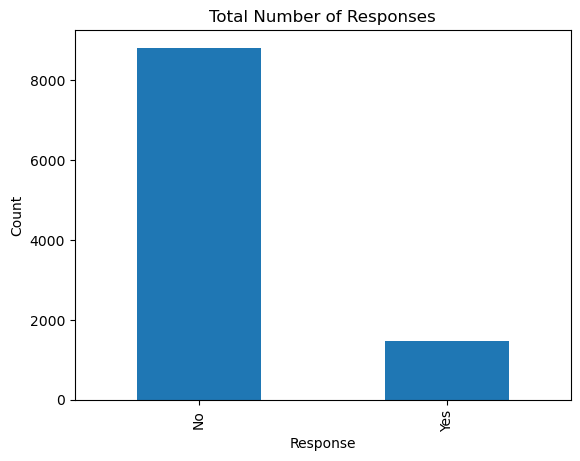

In [46]:
response_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Number of Responses')
plt.show()

In [47]:
#Import the seaborn library
import seaborn as sns

In [24]:
response_rate = df1.groupby('sales_channel')['response'].mean().reset_index()

TypeError: Could not convert NoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesYesYesYesNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoYesNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoYesYesYesNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoNoYesYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoYesYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoYesNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoYesYesYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoYesYesYesYesNoNoYesNoNoNoNoNoNoYesYesNoYesNoYesNoYesNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoYesYesNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesNoNoYesNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoYesYesYesNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoYesNoYesNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNo to numeric

In [48]:
print(df1['sales_channel'].dtypes)

object


In [49]:
print(df1['response'].dtypes)

object


In [50]:
df1['response'] = df1['response'].astype(int)

ValueError: invalid literal for int() with base 10: 'No'

In [51]:
# I need to affirm the values 
print(df1['response'].unique())

['No' 'Yes']


In [52]:
#convert the values yes in number 1 and no in number 0, so now i can convert in astype.(int)
df1['response'] = df1['response'].replace({'Yes': 1, 'No': 0})
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [53]:
df1['response'] = df1['response'].astype(int)

In [54]:
mean_value = df1['response'].mean()
df1

,unnamed:_0,customer,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,0,DK49336,Arizona,4809.216960,0,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2011-02-18
1,1,KX64629,California,2228.525238,0,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,2011-01-18
2,2,LZ68649,Washington,14947.917300,0,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,3,XL78013,Oregon,22332.439460,1,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
4,4,QA50777,Oregon,9025.067525,0,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,0,Basic,High School or Below,2/24/11,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10905,10905,FE99816,Nevada,15563.369440,0,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,2011-01-19
10906,10906,KX53892,Oregon,5259.444853,0,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,10907,TL39050,Arizona,23893.304100,0,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2011-02-06


In [55]:
response_rate = df1.groupby('sales_channel')['response'].mean().reset_index()

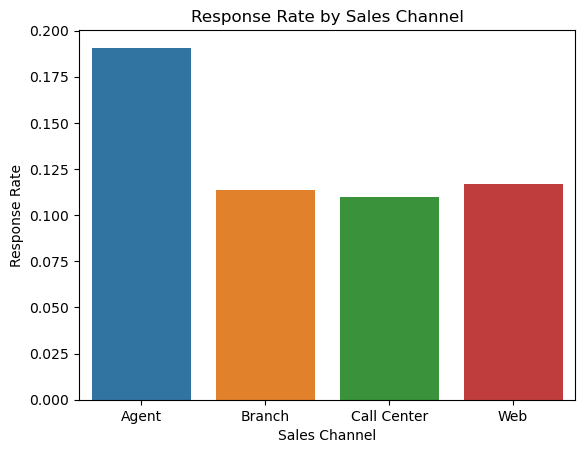

In [56]:
#Now , we can show a plot of the response rate by the sales channel.
sns.barplot(data=response_rate, x='sales_channel', y='response')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate by Sales Channel')
plt.show()

In [57]:
#Show a plot of the response rate by the total claim amount.
response_rate = df1.groupby('total_claim_amount')['response'].mean()

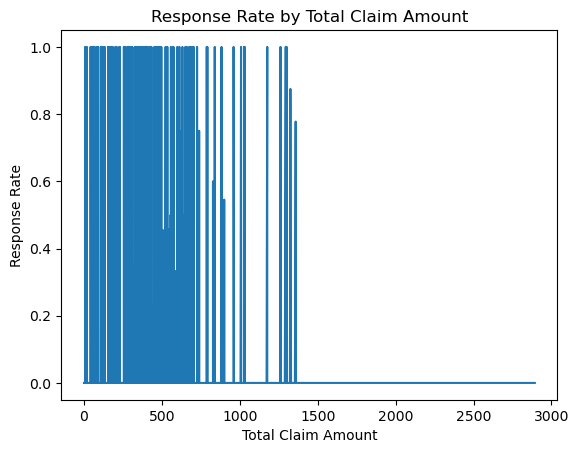

In [58]:
response_rate.plot(kind='line')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rate by Total Claim Amount')
plt.show()

In [59]:
#Show a plot of the response rate by income.
response_rate = df1.groupby('income')['response'].mean()

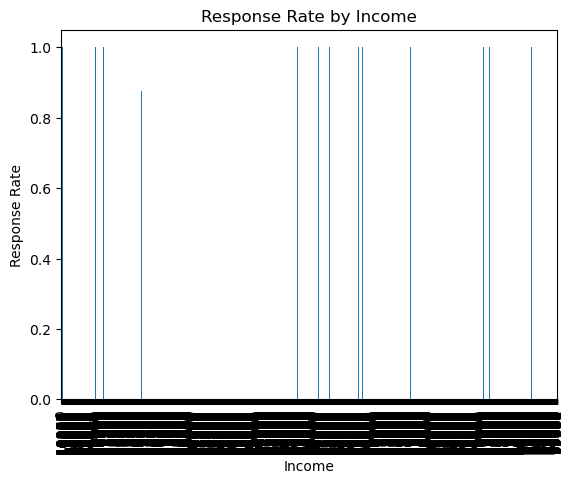

In [68]:
response_rate.plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate by Income')
plt.xticks(rotation=90)
plt.show()